# Real Estate Price Prediction using Deep Learning

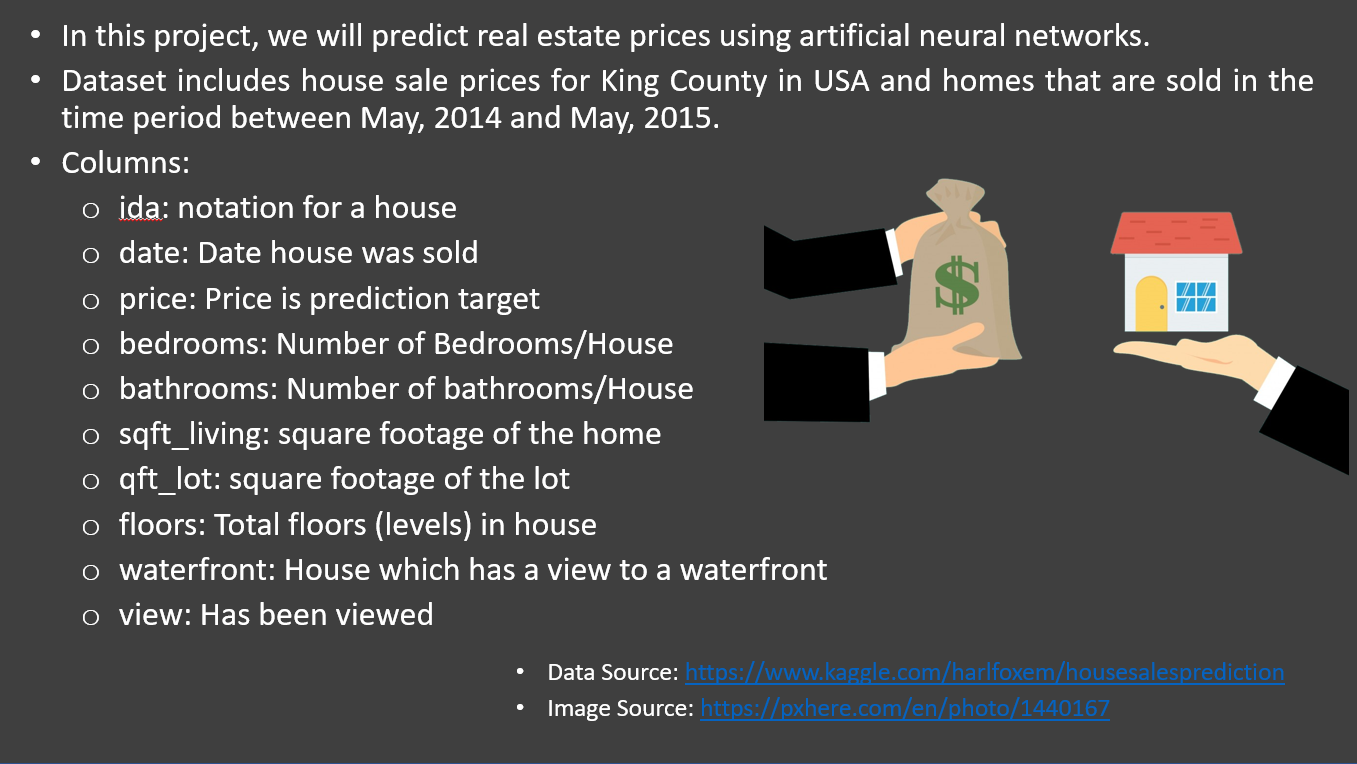

We have to predict the price of the house on the basis of the given data. Its a regression problem as the price is the continuous data.

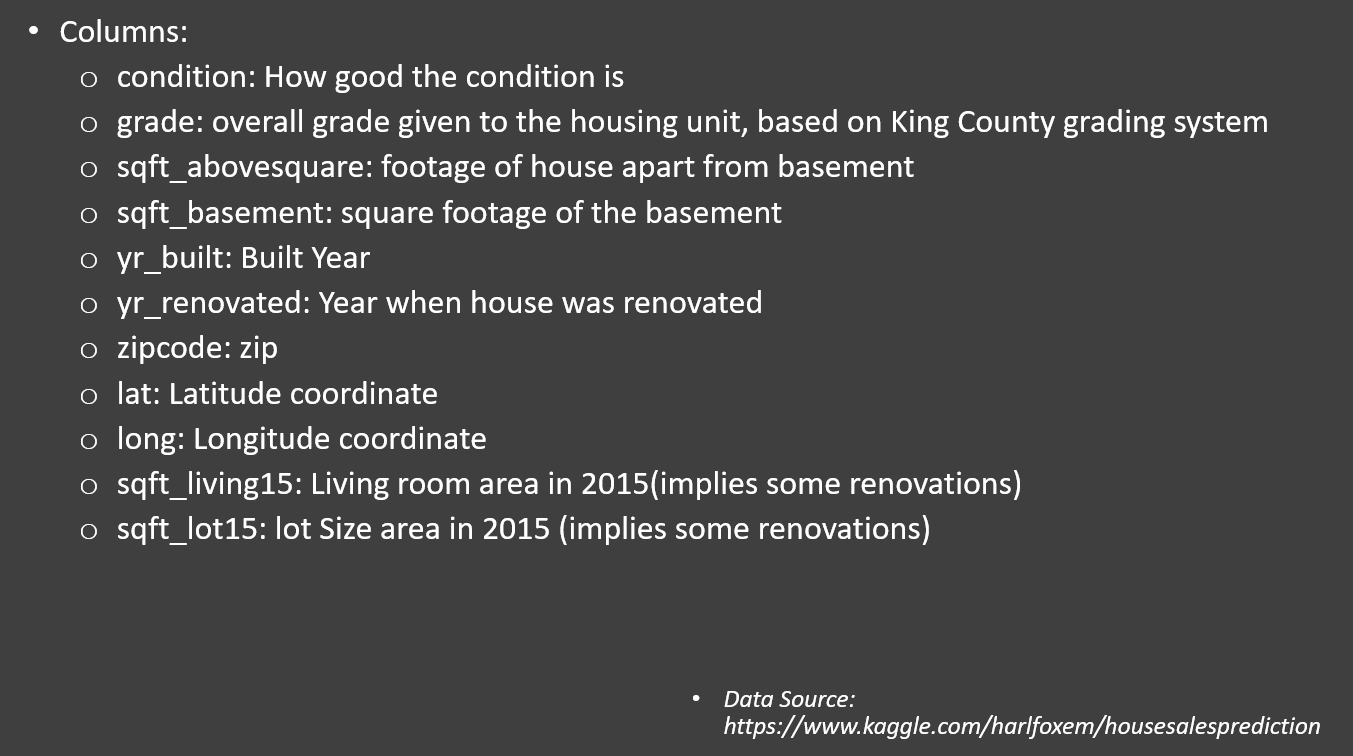

# Importing the Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns #for data visualiztion
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\UJJWAL KUMAR\ResumeProject\Real_Estate_Price_Prediction_Using Deep Learning\realestate_prices.csv", encoding = 'ISO-8859-1')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


price column is the output

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

data frame having 21613 rows and the 21 columns

# Getting some insights from the data

In [5]:
print('average house price is:',df['price'].mean())
print('price of the cheapest house is:', df['price'].min())
print('average number of bathrooms is: ', round(df['bathrooms'].mean()))
print('average number of bedrooms is: ', round(df['bedrooms'].mean()))
print('maximum number of bedrooms is: ', df['bedrooms'].max())

average house price is: 540088.1417665294
price of the cheapest house is: 75000.0
average number of bathrooms is:  2
average number of bedrooms is:  3
maximum number of bedrooms is:  33


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#  PERFORM DATA VISUALIZATION

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

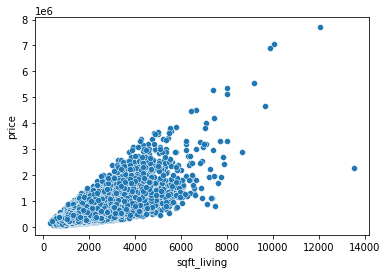

In [7]:
sns.scatterplot(x='sqft_living', y='price', data=df)

What we see here is, as a square footage tend
to increase here, the price tend to increase
as well at the house. That makes complete sense.
And this confirmed that the data at least
makes sense from a very high level.
Okay, next we wanted to plot the histogram.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

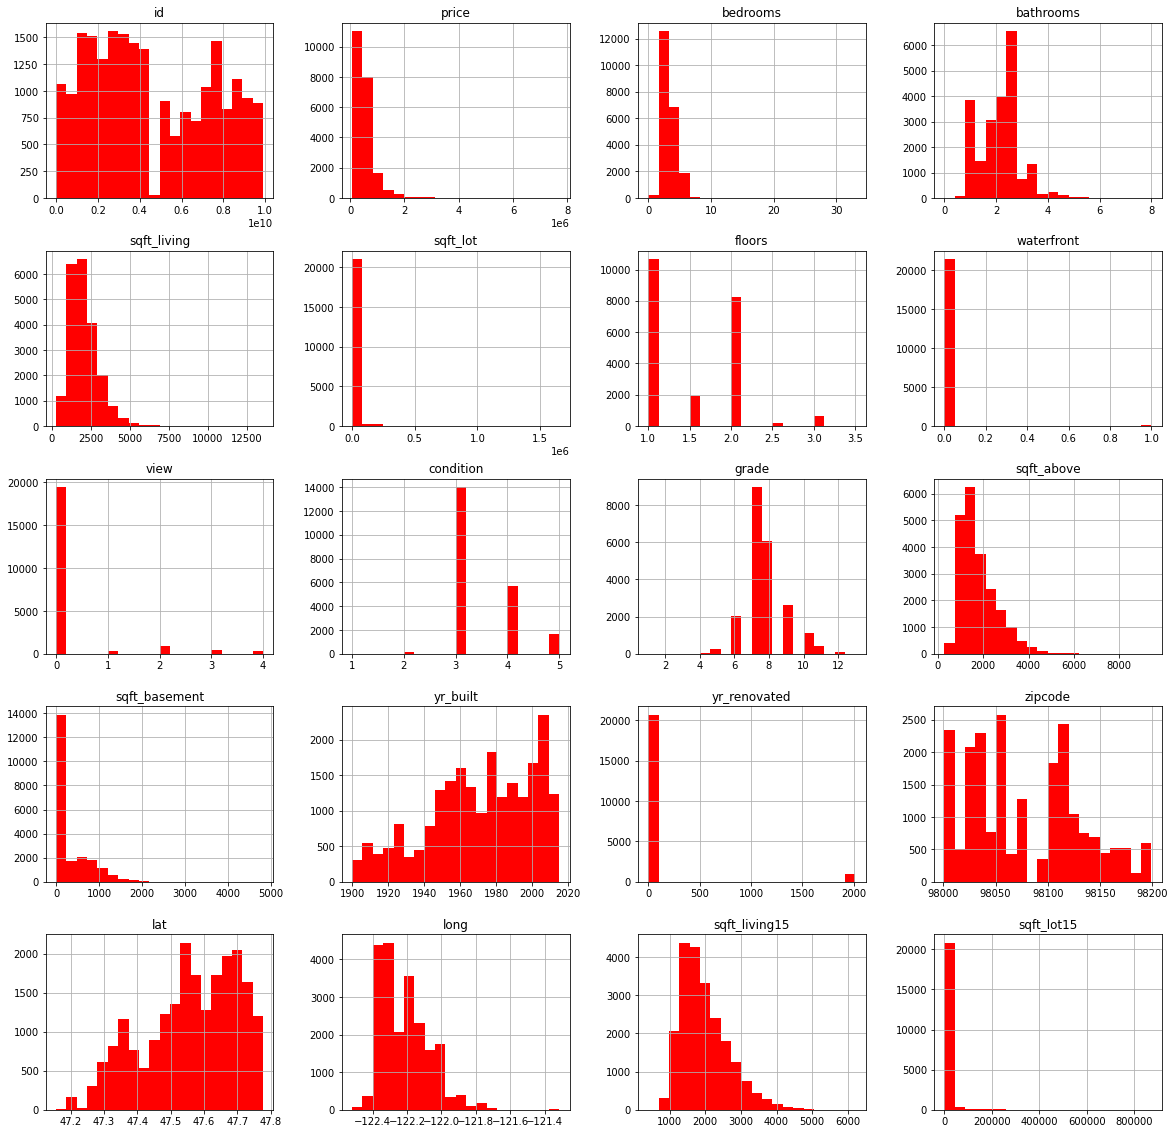

In [11]:
df.hist(bins=20, figsize=(20,20), color='r')

visualizing the correlation matrix

<AxesSubplot:>

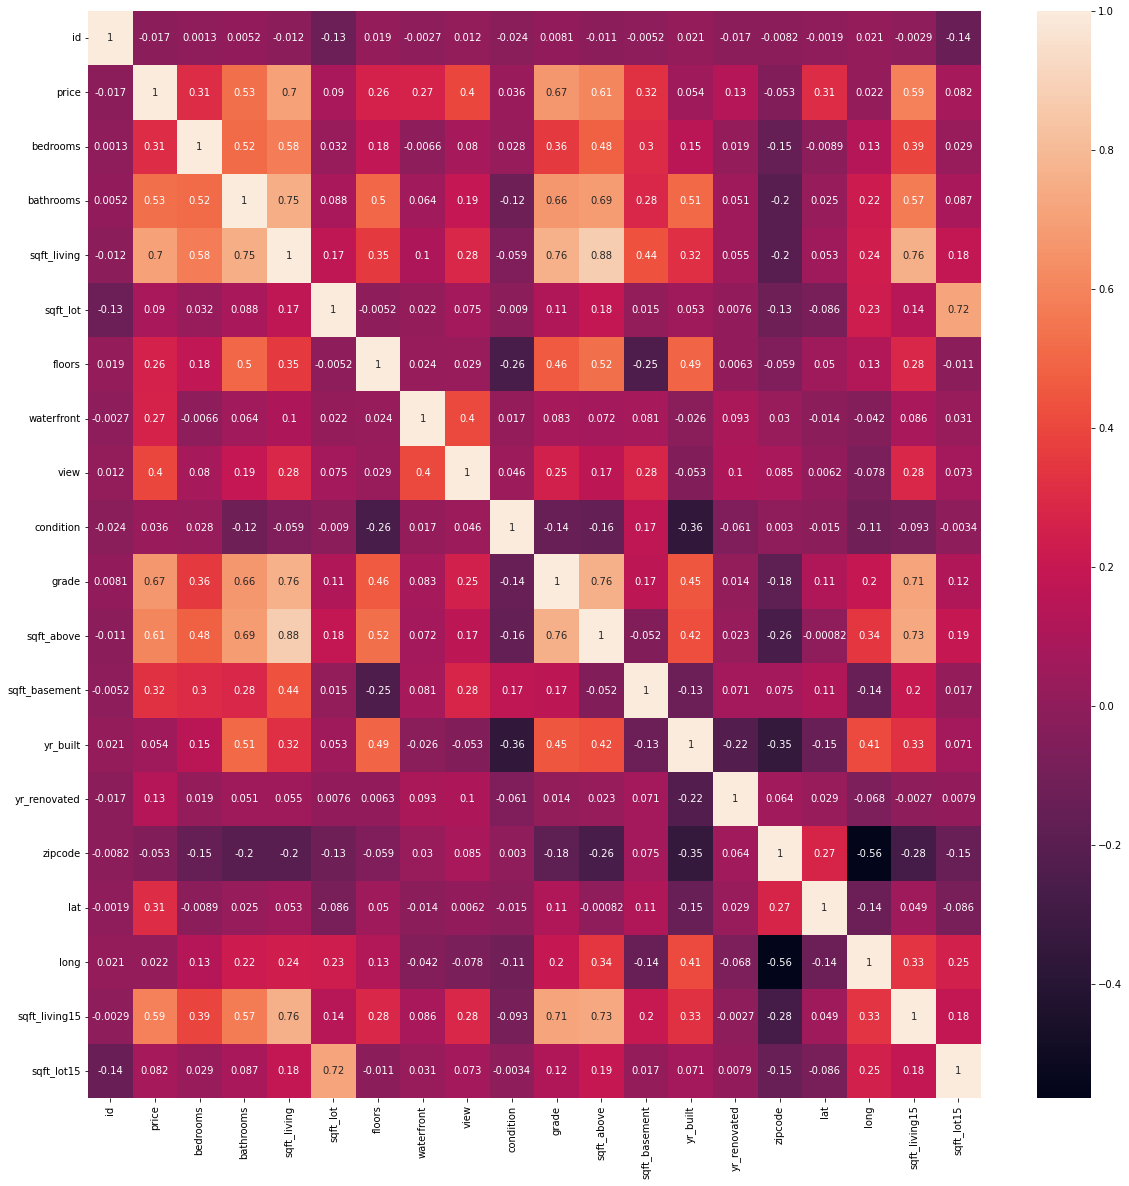

In [12]:
g, axis = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Above we can see the correlation between the different features

# Splitting dataset into dependent and independent set

In [29]:
x=df.drop(['price','id','date','zipcode','lat','long'],axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [32]:
y=df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

# Getting top 10 features contributing in house prediction using mutualinfo regression

In [34]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x,np.array(y).flatten())
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
top_columns=mutual_info.sort_values(ascending=False).head(7).index # Top 7 columns selection 
top_columns

Index(['sqft_living', 'grade', 'sqft_living15', 'sqft_above', 'bathrooms',
       'bedrooms', 'sqft_lot15'],
      dtype='object')

In [38]:
X=x[top_columns]

In [39]:
X.head()

,sqft_living,grade,sqft_living15,sqft_above,bathrooms,bedrooms,sqft_lot15
0,1180,7,1340,1180,1.00,3,5650
1,2570,7,1690,2170,2.25,3,7639
2,770,6,2720,770,1.00,2,8062
3,1960,7,1360,1050,3.00,4,5000
4,1680,8,1800,1680,2.00,3,7503


PairPlot

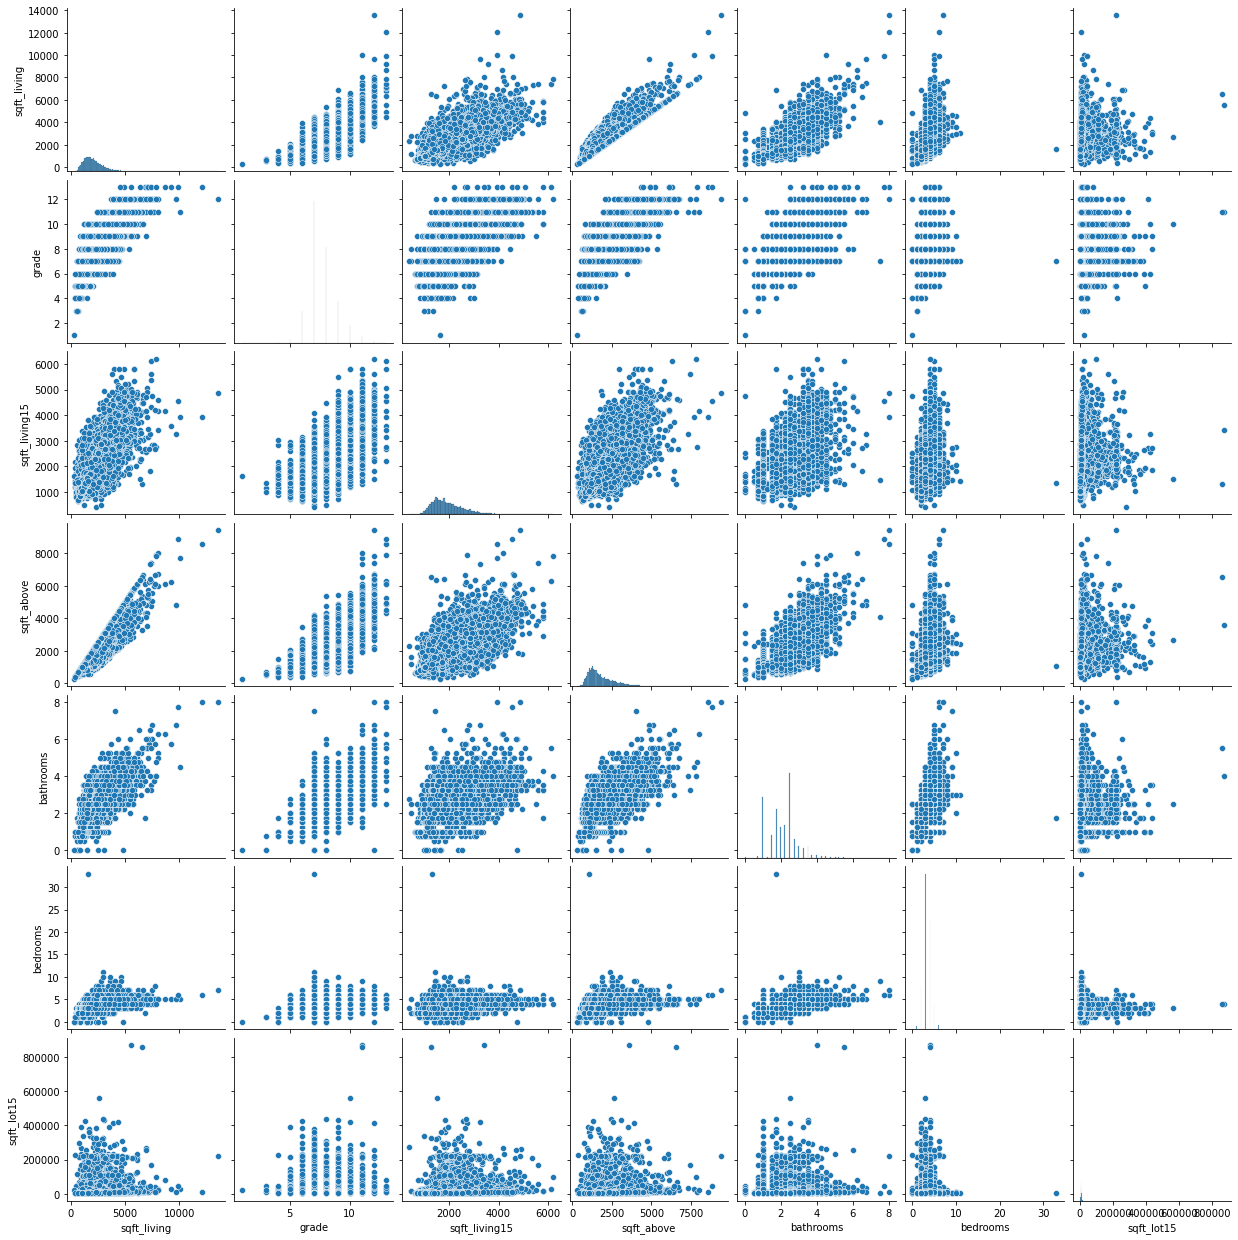

In [46]:
sns.pairplot(X)

# Data preprocessing and Feature Enginnering

In [47]:
X.shape

(21613, 7)

Our X has 21613 rows and 7 columns.

In [48]:
y.shape

(21613,)

Our y has 21613 rows but only one column.

In [49]:
# Load MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
X_scaled

array([[0.06716981, 0.5       , 0.16193426, ..., 0.125     , 0.09090909,
        0.00574235],
       [0.17207547, 0.5       , 0.22216486, ..., 0.28125   , 0.09090909,
        0.00802712],
       [0.03622642, 0.41666667, 0.3994149 , ..., 0.125     , 0.06060606,
        0.00851302],
       ...,
       [0.05509434, 0.5       , 0.10686629, ..., 0.09375   , 0.06060606,
        0.00155764],
       [0.09886792, 0.58333333, 0.17398038, ..., 0.3125    , 0.09090909,
        0.00073057],
       [0.05509434, 0.5       , 0.10686629, ..., 0.09375   , 0.06060606,
        0.00081098]])

In [51]:
# If you check out the shape right now, nothing will change.
# We still have the same features
X_scaled.shape

(21613, 7)

In [52]:
# check out the max of the data
scaler.data_max_

array([1.354e+04, 1.300e+01, 6.210e+03, 9.410e+03, 8.000e+00, 3.300e+01,
       8.712e+05])

In [53]:
# check out the min of the data
scaler.data_min_

array([290.,   1., 399., 290.,   0.,   0., 651.])

In [54]:
# We're going to reshape the output.
y = y.values.reshape(-1,1)

In [55]:
# We're going to do the same as well for the scaler for the output two.
y_scaled = scaler.fit_transform(y)

In [56]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

So now we have scaled the input and scaled the output and now we're
ready for the next task where we're going to train
a deep learning model with limited number of features.

# TRAINING A DEEP LEARNING MODEL

So what we wanted to do right now is first split our data into training and testing.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [58]:
# confirm X_train shape
X_train.shape

(16209, 7)

In [60]:
# confirm X_test shape
X_test.shape

(5404, 7)

Next, we're going to use tensorflow and use keras api.
Keras is a high level api that could be used to build really powerful deep
neural network models with very simple lines of code.

In [61]:
import tensorflow.keras
# import sequential
from tensorflow.keras.models import Sequential
# and then import dense.
from tensorflow.keras.layers import Dense

# Instantiate an object
model = Sequential()

model.add(Dense(100, input_dim = 7, 
                activation = 'relu')) 
model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='linear'))

In [63]:
# print out the summary of our model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


Here, it's showing us that we have 21,000 trainable parameters
in here. Think of it when we train any deep neural
network model, we have a bunch of inputs, we have a bunch
of outputs and we have all these different neurons
and we have weights or connections between these neurons.
And all what we're trying to do is that we're trying to optimize
and try to find the optimal values of these weights.

In [64]:
# compile the model
model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [65]:
# Now, let's apply the fit method to our model and pass it
# along our training data which is X_train, y_train.
# We'll also specify the number of epochs to be 100 epochs.
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split=0.2)


Epoch 1/100
260/260 [==============================] - 2s 6ms/step - loss: 0.0012 - val_loss: 9.3534e-04
Epoch 2/100
260/260 [==============================] - 1s 5ms/step - loss: 9.8747e-04 - val_loss: 8.8987e-04
Epoch 3/100
260/260 [==============================] - 1s 5ms/step - loss: 9.2768e-04 - val_loss: 8.8954e-04
Epoch 4/100
260/260 [==============================] - 1s 5ms/step - loss: 9.2518e-04 - val_loss: 9.1112e-04
Epoch 5/100
260/260 [==============================] - 1s 5ms/step - loss: 9.4346e-04 - val_loss: 9.0454e-04
Epoch 6/100
260/260 [==============================] - 1s 5ms/step - loss: 9.2418e-04 - val_loss: 9.2905e-04
Epoch 7/100
260/260 [==============================] - 1s 4ms/step - loss: 9.1177e-04 - val_loss: 9.9840e-04
Epoch 8/100
260/260 [==============================] - 1s 5ms/step - loss: 9.1622e-04 - val_loss: 8.8470e-04
Epoch 9/100
260/260 [==============================] - 1s 5ms/step - loss: 8.8283e-04 - val_loss: 8.3218e-04
Epoch 10/100
260/260 [=

260/260 [==============================] - 1s 5ms/step - loss: 7.5678e-04 - val_loss: 9.4635e-04
Epoch 76/100
260/260 [==============================] - 1s 4ms/step - loss: 7.4552e-04 - val_loss: 8.1643e-04
Epoch 77/100
260/260 [==============================] - 1s 5ms/step - loss: 7.5695e-04 - val_loss: 7.9943e-04
Epoch 78/100
260/260 [==============================] - 1s 6ms/step - loss: 7.4700e-04 - val_loss: 7.5794e-04
Epoch 79/100
260/260 [==============================] - 1s 5ms/step - loss: 7.4706e-04 - val_loss: 8.0669e-04
Epoch 80/100
260/260 [==============================] - 1s 5ms/step - loss: 7.3741e-04 - val_loss: 8.1126e-04
Epoch 81/100
260/260 [==============================] - 1s 5ms/step - loss: 7.7583e-04 - val_loss: 7.6656e-04
Epoch 82/100
260/260 [==============================] - 1s 5ms/step - loss: 7.1995e-04 - val_loss: 7.8548e-04
Epoch 83/100
260/260 [==============================] - 1s 4ms/step - loss: 7.3740e-04 - val_loss: 7.5994e-04
Epoch 84/100
260/260 [=

# Evaluating the model

Now, let's evaluate the performance of our model.
If we recall our epochs_hist variable above, there we captured all the different performance of the model throughout the various epochs.

In [66]:
# let's check out the keys
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

We have two keys: 
- the loss and,
- the validation loss as well.

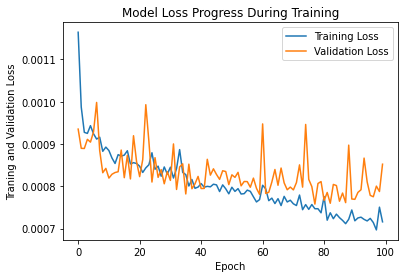

In [67]:
# let's plot the loss
plt.plot(epochs_hist.history['loss'])

# plot the validation loss
plt.plot(epochs_hist.history['val_loss'])

# add title, x-label, and y-label as well
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Traning and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

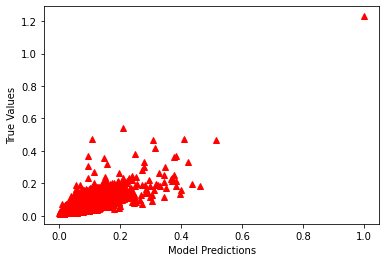

In [73]:
# first generate the y_predict value by passing along the X_test data
y_predict = model.predict(X_test)
# plot by passing along the y_test as x-axis vs. y_preidct as x-axis
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [74]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

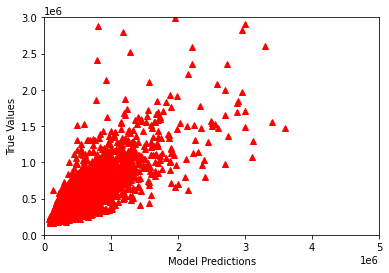

In [75]:
# let's plot it
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

Now we have the exact same data. But now we have the
units here in x_axis in dollars, which is a lot more readable compared to the previous one.

Finally, what I wanted to do is I wanted to generate all the
different metrics in here.

In [76]:
# first, obtain the length of our testing data
k = X_test.shape[1]
n = len(X_test)
n

5404

In [77]:
k

7

In [78]:
# Now let's plot the Root Mean Squared Error(RMSE), Mean Squared Error(MSE), Mean Absolute Error(MAE),
# r-squared(r2) which is the coefficient of detrmination, and the adjusted r-squared(more conservative of r2)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

# print all of these values here.

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =',r2, '\nAdjusted R2 =',adj_r2)

RMSE = 219161.765 
MSE = 48031879186.90165 
MAE = 135803.38415699019 
R2 = 0.6300053794626334 
Adjusted R2 = 0.6295254012669771
